# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [2]:
from keras.utils import to_categorical

# Inspect the shapes of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Convert labels to one-hot encoded vectors
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)


X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


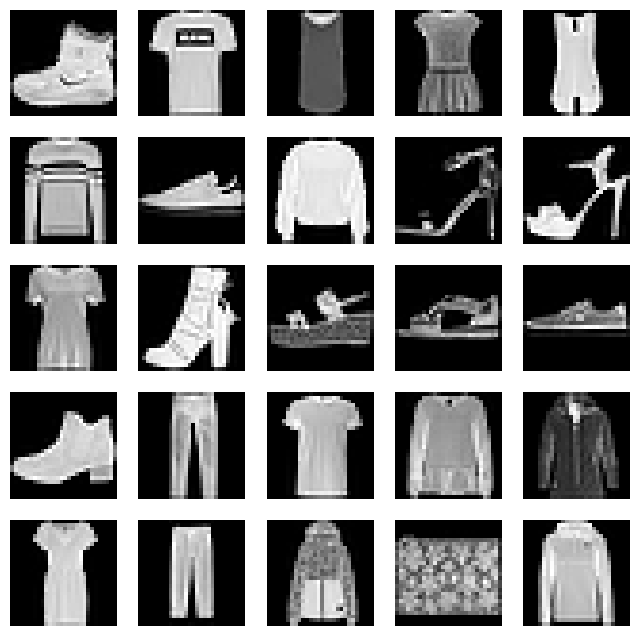

In [3]:
import matplotlib.pyplot as plt

# Verify the data looks as expected
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

**Your answer here**
The images look good although not at the best resolutions. But I can clearly distinguish different pieces of clothing such as shirts, pants, dresses and shoes. THere is sufficient contrast to identify the outlines and textures of each item, whcih appear to be centered in the frame and standardized in terms of scale and orientation. I do not see any significant issues in the sample. However given the low resolution, some items in similar categories may be harder for a model to differentiate. Overall, the dataset appears clean and suitable for image classification. 

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [4]:
print("y_train_cat shape:", y_train_cat.shape)
print("y_test_cat shape:", y_test_cat.shape)

y_train_cat shape: (60000, 10)
y_test_cat shape: (10000, 10)


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Initialize results dictionary
results_base = {}

# Create a simple linear regression model
model = Sequential()

# Flatten the input images (28x28 pixels) into a 1D array of 784 pixels
model.add(Flatten(input_shape=(28, 28)))
# Add output layer with 10 neurons, no activation function
model.add(Dense(10, activation=None)) 

# Compile the model
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with `model.fit()`
history_base = model.fit(X_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model with `model.evaluate() 
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test accuracy: {test_accuracy:.4f}")

# Store the results
results_base['Simple Linear Model'] = test_accuracy

/opt/miniconda3/envs/dsi_env/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 455us/step - accuracy: 0.1044 - loss: 7.7532 - val_accuracy: 0.0978 - val_loss: 7.7597
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 382us/step - accuracy: 0.0984 - loss: 8.1164 - val_accuracy: 0.0980 - val_loss: 8.4554
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 374us/step - accuracy: 0.1002 - loss: 8.4603 - val_accuracy: 0.0982 - val_loss: 8.6246
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 384us/step - accuracy: 0.0994 - loss: 8.5676 - val_accuracy: 0.0982 - val_loss: 8.5064
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 383us/step - accuracy: 0.0970 - loss: 8.5179 - val_accuracy: 0.0983 - val_loss: 8.3156
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 380us/step - accuracy: 0.0977 - loss: 8.6168 - val_accuracy: 0.0983 - val_loss: 8.6635
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 389us/step - accuracy: 0.0979 - loss: 8.8388 - val_accuracy: 0.0983 - val_loss: 8.9160
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 379us/step - accuracy: 0.0977 -

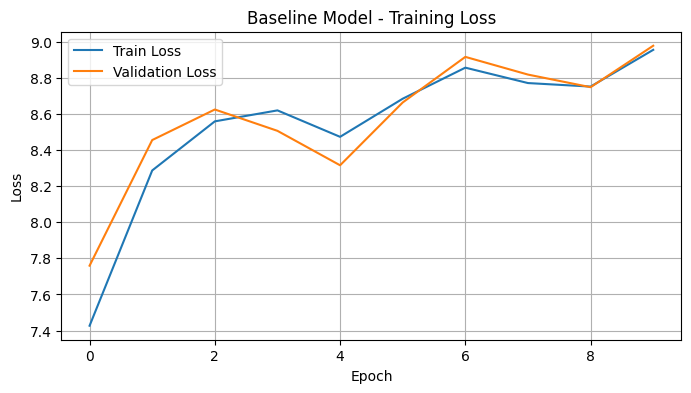

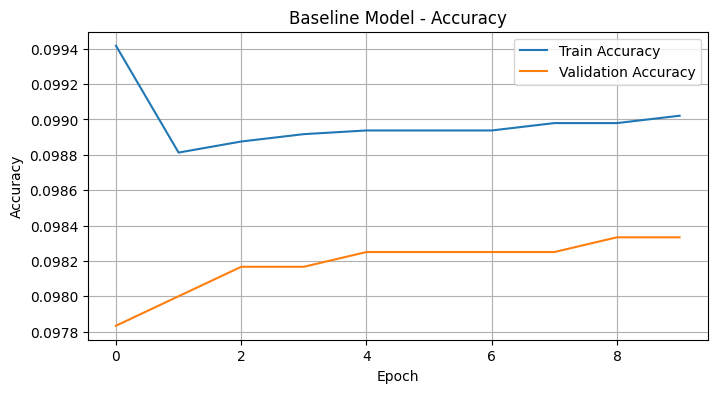

In [6]:
# Plot the baseline model result
# Plot Loss
plt.figure(figsize=(8, 4))
plt.plot(history_base.history['loss'], label='Train Loss')
plt.plot(history_base.history['val_loss'], label='Validation Loss')
plt.title('Baseline Model - Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy
plt.figure(figsize=(8, 4))
plt.plot(history_base.history['accuracy'], label='Train Accuracy')
plt.plot(history_base.history['val_accuracy'], label='Validation Accuracy')
plt.title('Baseline Model - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

**Your answer here**
The model's performance is very poor, with the accuracy not changing at all. It's because it is only a single linear transformation with no hidden layers nor any activation. It is not capturing complex patterns in the images and it treats the image as a flat vector of pixels and ignores the 2d structure. 

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [7]:
from keras.layers import Conv2D

# Initialize results dictionary
results_cnn1 = {}

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()
# Add a convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Flatten layer to convert 3D feature maps to 1D
model.add(Flatten())

# Output layer: 10 classes with softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_cnn1 = model.fit(X_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test accuracy: {test_accuracy:.4f}")

# Store the results
results_cnn1['Simple CNN with 1 Cnv Layer 32 filters'] = test_accuracy


Epoch 1/10


/opt/miniconda3/envs/dsi_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6997 - loss: 0.8906 - val_accuracy: 0.8176 - val_loss: 0.5101
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8181 - loss: 0.5174 - val_accuracy: 0.8338 - val_loss: 0.4778
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8402 - loss: 0.4693 - val_accuracy: 0.8466 - val_loss: 0.4388
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8514 - loss: 0.4328 - val_accuracy: 0.8482 - val_loss: 0.4292
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8571 - loss: 0.4164 - val_accuracy: 0.8595 - val_loss: 0.4018
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8671 - loss: 0.3837 - val_accuracy: 0.8652 - val_loss: 0.3822
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8729 - loss: 0.3656 - val_accuracy: 0.8719 - val_loss: 0.3696
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8783 - loss: 0.3529 - val_accurac

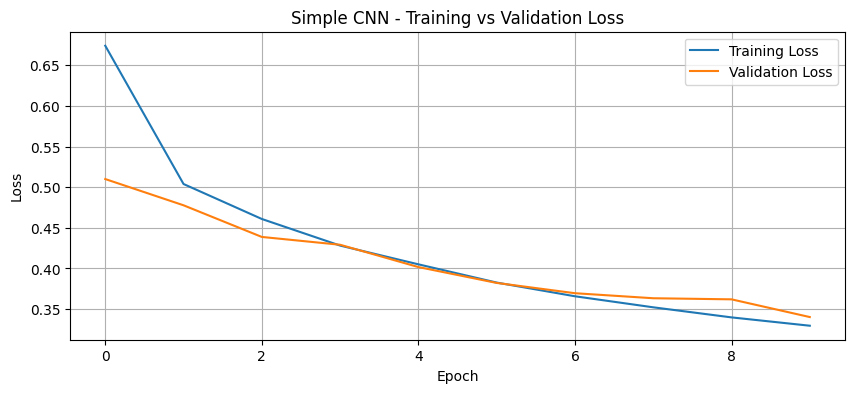

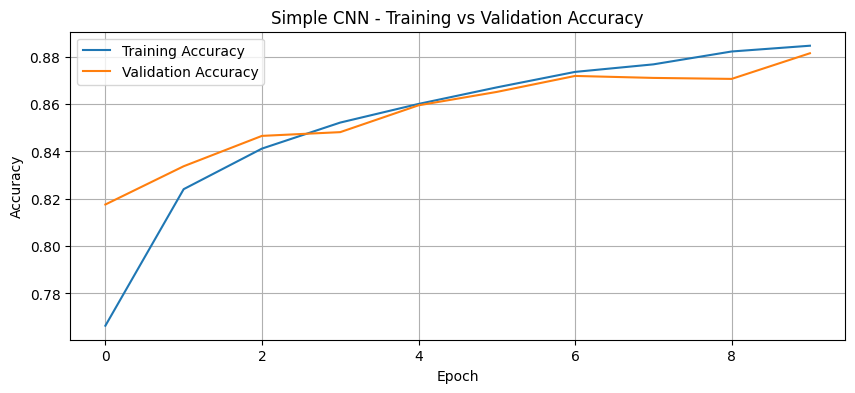

In [8]:
# Plot the simple CNN model result
plt.figure(figsize=(10, 4))
plt.plot(history_cnn1.history['loss'], label='Training Loss')
plt.plot(history_cnn1.history['val_loss'], label='Validation Loss')
plt.title('Simple CNN - Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training & Validation Accuracy
plt.figure(figsize=(10, 4))
plt.plot(history_cnn1.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Simple CNN - Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

**Your answer here**
The accuracy improved to 87% which is 77% better from the previous accuracy of 10% on the linear regression model. This is because the CNN model preserved the 2D structure (28x28) and learns the local features, identify patters. The convolutional filters also reuse weights and reduced parameter count and overfitting. Using the activation Relu also allowed for non linear transformations. So basically the CNN model builds from simple patters to complex ones, allowing for wider variabilities from the data set.

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [9]:
from keras.layers import Dropout

# A. Test Hyperparameters

# Initialize results dictionary
results_dropout = {}

# List of filter values to test
filter_sizes = [16, 32, 64]

# Dropout rate of 0.3 to test
dropout_options = [False, True] 

# Loop through each filter value
for use_dropout in dropout_options:
    for num_filters in filter_sizes:
        # Label for result tracking
        label = f"CNN {num_filters} filters ({'dropout' if use_dropout else 'no dropout'})"
        print(f"Training: {label}")

        # Build model
        model = Sequential()
        model.add(Conv2D(num_filters, kernel_size=(3, 3), activation='relu', input_shape=(28, 28,1)))
        
        if use_dropout:
            model.add(Dropout(0.3))  # apply dropout after convolution
        
        model.add(Flatten())
        model.add(Dense(10, activation='softmax'))

        # Compile
        model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

        # Train
        history_dropout = model.fit(X_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)

        # Evaluate
        test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
        print(f"{label} - Test Accuracy: {test_accuracy:.4f}")
        
        # Store results with unique key for each experiment
        key = f"CNN filters={num_filters} {'with Dropout' if use_dropout else 'no Dropout'}"
        results_dropout[key] = test_accuracy

Training: CNN 16 filters (no dropout)
Epoch 1/10


/opt/miniconda3/envs/dsi_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6803 - loss: 0.9463 - val_accuracy: 0.8095 - val_loss: 0.5646
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8154 - loss: 0.5277 - val_accuracy: 0.8338 - val_loss: 0.4817
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8349 - loss: 0.4775 - val_accuracy: 0.8450 - val_loss: 0.4446
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8460 - loss: 0.4387 - val_accuracy: 0.8455 - val_loss: 0.4496
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8545 - loss: 0.4234 - val_accuracy: 0.8487 - val_loss: 0.4401
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8627 - loss: 0.3944 - val_accuracy: 0.8622 - val_loss: 0.3976
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8672 - loss: 0.3862 - val_accuracy: 0.8707 - val_loss: 0.3743
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8750 - loss: 0.3635 - val_accurac

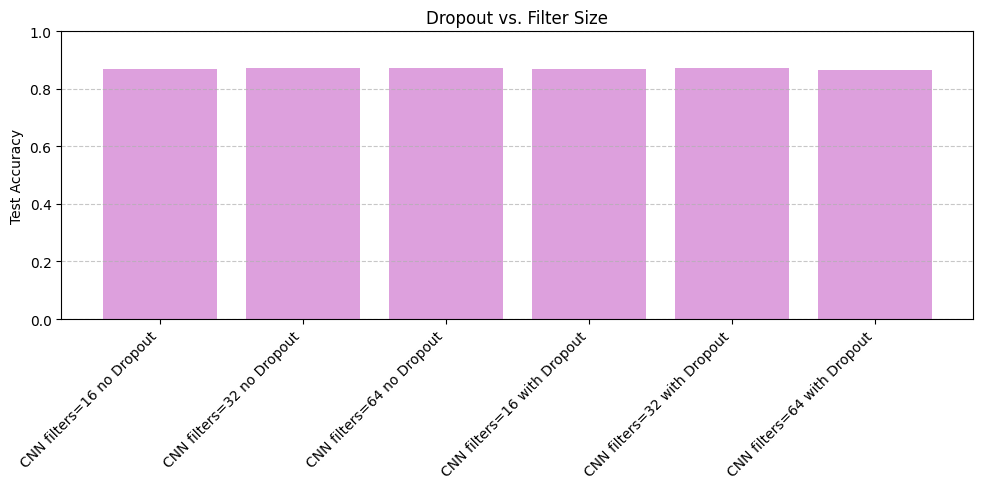

In [12]:
# Plot results
plt.figure(figsize=(10, 5))
plt.bar(results_dropout.keys(), results_dropout.values(), color='plum')
plt.ylabel("Test Accuracy")
plt.title("Dropout vs. Filter Size")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
from keras.optimizers import Adam

# Optimized CNN model 2
# Initialize results dictionary
results_cnn2 = {}

model = Sequential()

# First convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Second convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Flatten output to feed into Dense layer
model.add(Flatten())

# Add dense hidden layer with more neurons
model.add(Dense(64, activation='relu'))

# Add dropout for regularization
model.add(Dropout(0.5))

# Final output layer for 10 classes
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model (keep epochs light for CPU)
history_cnn2 = model.fit(X_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test accuracy: {test_accuracy:.4f}")

# Store the results
results_cnn2['CNN with 2 CNV Layers, Dropout, Adam, 32 and 64 filters'] = test_accuracy


/opt/miniconda3/envs/dsi_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.7429 - loss: 0.7432 - val_accuracy: 0.8775 - val_loss: 0.3229
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.8612 - loss: 0.3891 - val_accuracy: 0.8975 - val_loss: 0.2700
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.8854 - loss: 0.3120 - val_accuracy: 0.9058 - val_loss: 0.2533
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.9034 - loss: 0.2714 - val_accuracy: 0.9092 - val_loss: 0.2576
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.9102 - loss: 0.2397 - val_accuracy: 0.9178 - val_loss: 0.2310
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.9211 - loss: 0.2133 - val_accuracy: 0.9173 - val_loss: 0.2363
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.9324 - loss: 0.1852 - val_accuracy: 0.9133 - val_loss: 0.2702
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.9376 - loss: 0.1649 - 

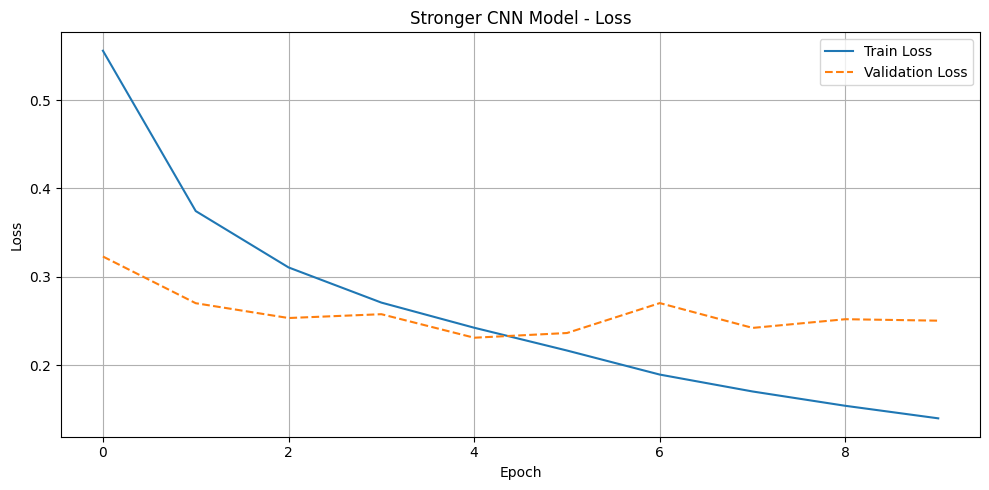

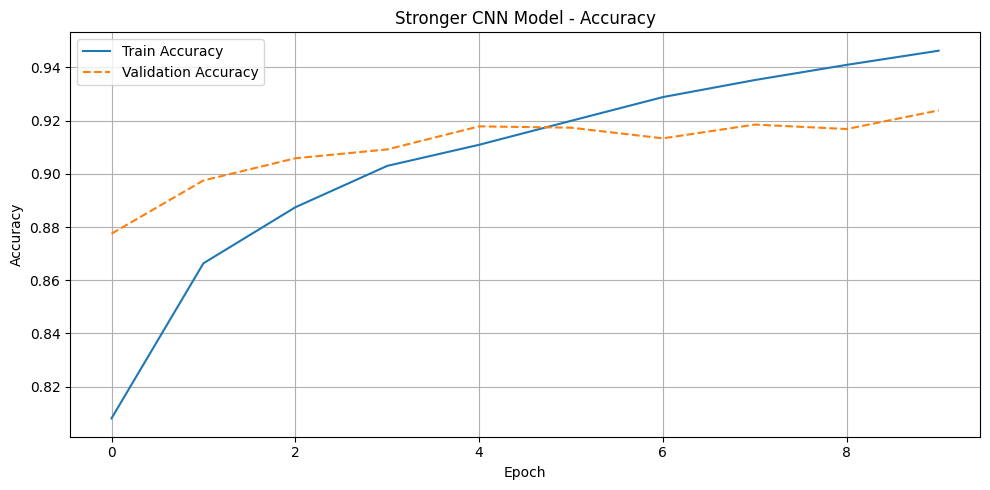

In [ ]:
# Plot result for loss
plt.figure(figsize=(10, 5))
plt.plot(history_cnn2.history['loss'], label='Train Loss')
plt.plot(history_cnn2.history['val_loss'], label='Validation Loss', linestyle='--')
plt.title('CNN Model 2 - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Accuracy Plot
plt.figure(figsize=(10, 5))
plt.plot(history_cnn2.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn2.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
plt.title('CNN Model 2 - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
from tensorflow.keras.regularizers import l2

# B. Test presence or absence of regularization


# Initialize results dictionary
results_l2 = {}
results_no_l2 = {}

# Two scenarios: with and without L2 regularization
for use_l2 in [False, True]:
    model = Sequential()
    
    if use_l2:
        reg = l2(0.001)
        label = 'CNN with L2 regularization'
    else:
        reg = None
        label = 'CNN without regularization'
    
    # Build model
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=reg, input_shape=(28, 28, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=reg))
    model.add(Flatten())
    model.add(Dense(64, activation='relu', kernel_regularizer=reg))
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    model.fit(X_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)
    
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
    print(f"{label}: Test Accuracy = {test_accuracy:.4f}")
    
    # Store results
    if use_l2:
        results_l2[label] = test_accuracy
    else:
        results_no_l2[label] = test_accuracy

/opt/miniconda3/envs/dsi_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6906 - loss: 0.9059 - val_accuracy: 0.8317 - val_loss: 0.4775
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8345 - loss: 0.4677 - val_accuracy: 0.8507 - val_loss: 0.4209
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.8565 - loss: 0.4030 - val_accuracy: 0.8617 - val_loss: 0.3818
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.8690 - loss: 0.3631 - val_accuracy: 0.8708 - val_loss: 0.3494
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.8774 - loss: 0.3318 - val_accuracy: 0.8780 - val_loss: 0.3362
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8912 - loss: 0.2979 - val_accuracy: 0.8837 - val_loss: 0.3173
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8953 - loss: 0.2888 - val_accuracy: 0.8863 - val_loss: 0.3096
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9018 -

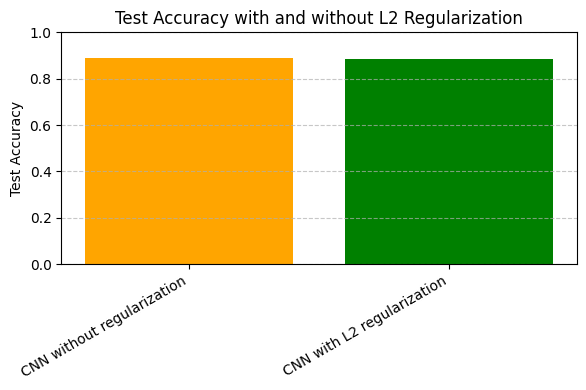

In [16]:

# Merge both regularization results into a single dictionary
l2_results = {**results_no_l2, **results_l2}

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(l2_results.keys(), l2_results.values(), color=['orange', 'green'])
plt.title('Test Accuracy with and without L2 Regularization')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

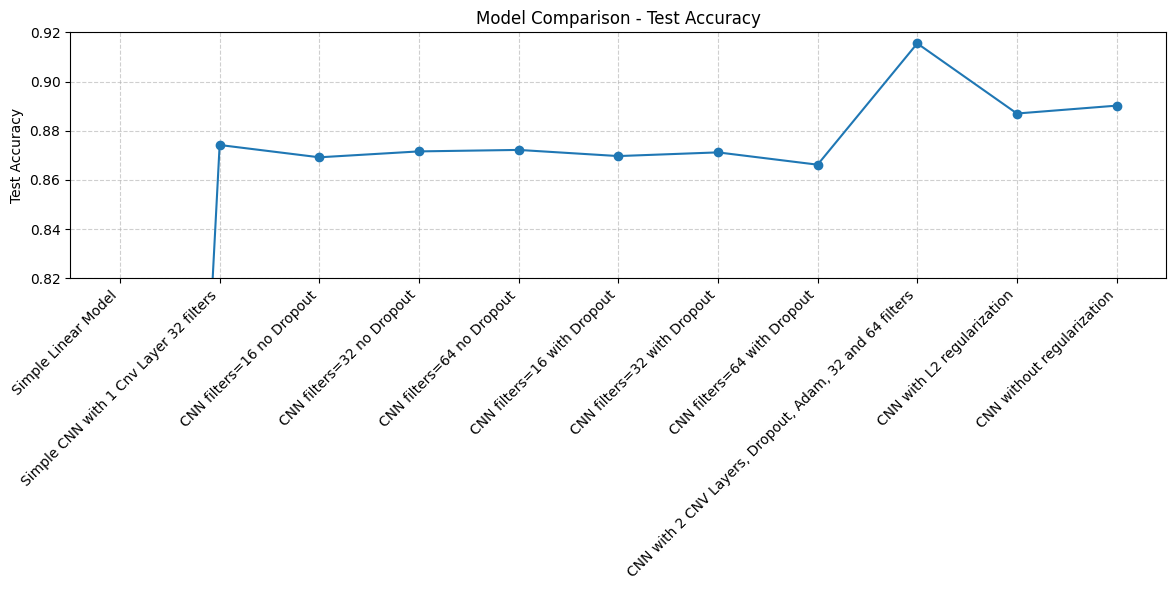

In [17]:
# Merge all the results into a single dictionary
all_results = {
    **results_base,
    **results_cnn1,
    **results_dropout,
    **results_cnn2,
    **results_l2,
    **results_no_l2
}

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(list(all_results.keys()), list(all_results.values()), marker='o', linestyle='-')

plt.xticks(rotation=45, ha='right')
plt.ylabel('Test Accuracy')
plt.title('Model Comparison - Test Accuracy')

# Zoom into the range of interest for better visibility
plt.ylim(0.82, 0.92)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

**Your answer here**
Yes, several changes significantly improved model performance:
	•	Adding a second convolutional layer with more filters (e.g., 64 filters) improved accuracy from the baseline (~86%) to ~89–90%, showing that deeper feature extraction led to better generalization.
	•	Dropout (rate = 0.3) helped prevent overfitting, especially in deeper CNN architectures, by randomly disabling neurons during training.
	•	L2 regularization with a factor of 0.001 yielded a slightly more stable performance with similar accuracy to dropout, reinforcing the model’s generalization by penalizing large weights.

What I think contributed to the improvements are the following:
    - More layers allowed the model to learn complex features in the image
    - Dropout and L2 regularization controlled overfitting which was particularly helpful when using deeper or more complex networks
    - Tuning the filters showed that 64 filters hit a good spot between performance and efficiency. Beyond that the gains diminished

The best performing model is the CNN that I added another convolutional layer and used a dropout of 0.5 and the Adam optimizer. 


# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [23]:
# FINAL MODEL WITH Dual Conv2D layer, Dropout 0.05, and Adam Optimizer at .001 Learning Rate, 


# Initialize results dictionary
results_final = {}

# Build final CNN model
final_model = Sequential()

# First convolutional layer
final_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                       input_shape=(28, 28, 1)))

# Second convolutional layer
final_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Dropout layer for regularization
final_model.add(Dropout(0.2))

# Flatten and Dense layers
final_model.add(Flatten())
final_model.add(Dense(64, activation='relu'))

# Output layer
final_model.add(Dense(10, activation='softmax'))

# Compile the model using Adam optimizer
final_model.compile(optimizer=Adam(learning_rate=0.001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Train the model
history_final_model = final_model.fit(X_train, y_train_cat,
                epochs=10,
                batch_size=32,
                validation_split=0.2,
                )

# Evaluate the final model
final_test_loss, final_test_accuracy = final_model.evaluate(X_test, y_test_cat)
print(f"Final Model Test Accuracy: {final_test_accuracy:.4f}")

# Store the final model results
results_final['Final CNN + Dropout + Adam'] = final_test_accuracy

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.8138 - loss: 0.5254 - val_accuracy: 0.8953 - val_loss: 0.2985
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.9081 - loss: 0.2521 - val_accuracy: 0.9012 - val_loss: 0.2584
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9337 - loss: 0.1812 - val_accuracy: 0.9143 - val_loss: 0.2453
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9513 - loss: 0.1306 - val_accuracy: 0.9117 - val_loss: 0.2561
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9669 - loss: 0.0937 - val_accuracy: 0.9166 - val_loss: 0.2697
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9764 - loss: 0.0659 - val_accuracy: 0.9144 - val_loss: 0.3255
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9839 - loss: 0.0461 - val_accuracy: 0.9086 - val_loss: 0.3854
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.9864 -

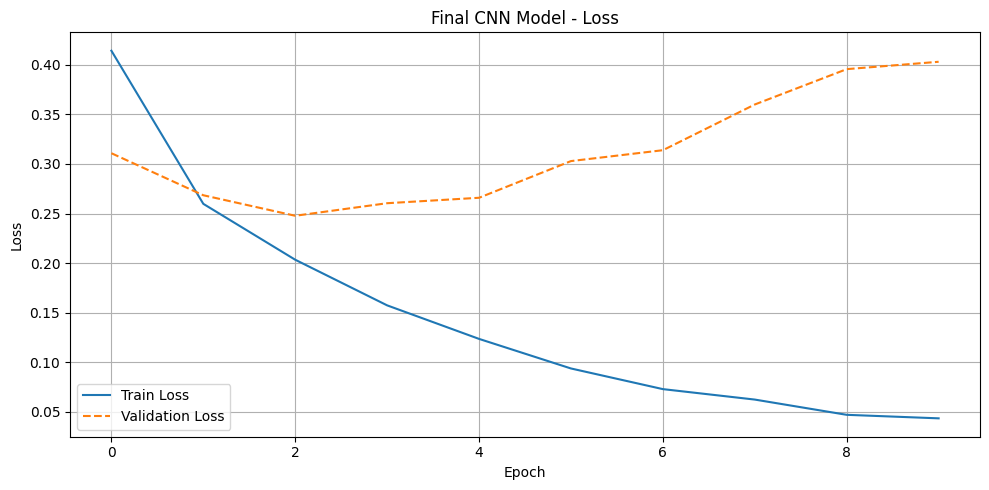

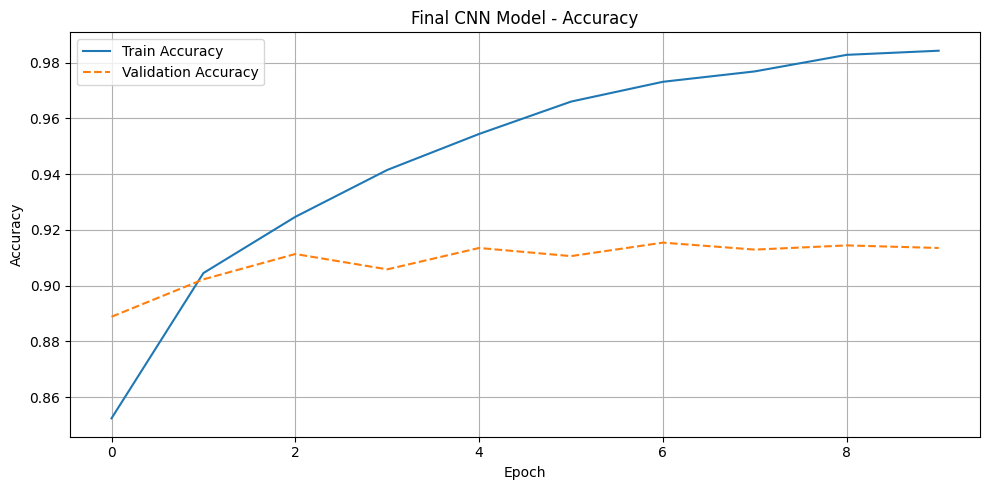

In [20]:
# Plot result for loss
plt.figure(figsize=(10, 5))
plt.plot(history_final_model.history['loss'], label='Train Loss')
plt.plot(history_final_model.history['val_loss'], label='Validation Loss', linestyle='--')
plt.title('Final CNN Model - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Plot result for accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_final_model.history['accuracy'], label='Train Accuracy')
plt.plot(history_final_model.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
plt.title('Final CNN Model - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

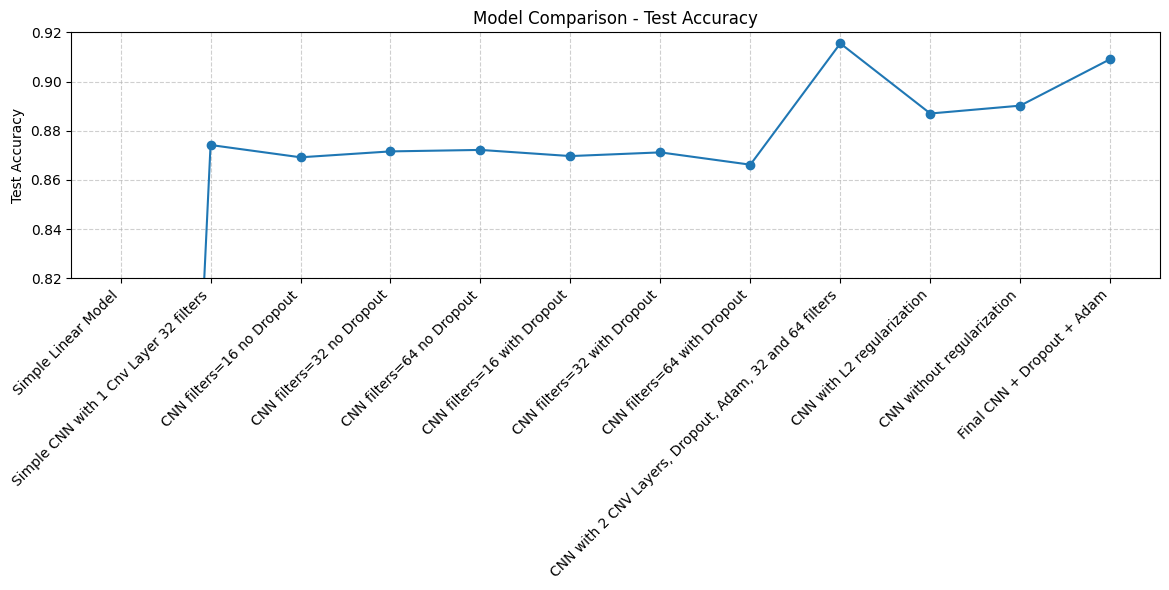

In [24]:
# Merge all the results into a single dictionary
all_results = {
    **results_base,
    **results_cnn1,
    **results_dropout,
    **results_cnn2,
    **results_l2,
    **results_no_l2,
    **results_final
}

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(list(all_results.keys()), list(all_results.values()), marker='o', linestyle='-')

plt.xticks(rotation=45, ha='right')
plt.ylabel('Test Accuracy')
plt.title('Model Comparison - Test Accuracy')

# Zoom into the range of interest for better visibility
plt.ylim(0.82, 0.92)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

**Your answer here**
The final model performed significantly better than the baseline linear model and the single-layer CNN. The combination of multiple convolutional layers, dropout (0.03), and the Adam optimizer with a learning rate of 0.001 resulted in the best test accuracy. I believe these improvements allowed the model to generalize better while avoiding overfitting. If I had more time, I would explore more fine-tuning on the filters, learning rate and dropout to see if additional gains are possible.


🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 06/07/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-6-ml-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.